<h1><center> COMPUTATIONAL FINANCE - STOCKS</center></h1> 
<h3><center> In this notebook I will analyse 5 tech companies stocks returns from 2012 to present date. For this purpose I will retireve data from Yahoo Finance. </center></h3> 
<h5><center> Francisco Ramalho </center></h5> 
<h5><center> October 2020 </center></h5> 

-------------------------------------------------------------

<h3 style='color:#5F6A6E' > Index:</h3>

<strong >1.</strong> [Getting historical data (close price and volume)](#section1) <p>
<strong>2.</strong> [Plotting the cumulative returns of the stocks on a single chart](#section2) <p>
<strong>3.</strong> [Creating the correlation matrix of the daily returns](#section3) <p>
<strong>4.</strong> [Saving the data (close price and volume) to a CSV file for each ticker](#section4) <p>
<strong>5.</strong> [Loading the data from the CSV files into a single DataFrame](#section5)<p>    

Tech companies in analysis:

     NVIDIA Corporation
     Advanced Micro Devices, Inc.
     Taiwan Semiconductor Manufacturing Company Limited
     Intel Corporation
     QUALCOMM Incorporated

<a id="section1">
<h3 style='color:#5F6A6E' > 1. Getting historical data (close price and volume)</h3>

In [1]:
import yfinance as yf
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt

today = date.today()
startdate = date(2012,1,1)

TickersDict={
      "NVIDIA" : "NVDA",        #NVIDIA Corporation
      "AMD" : "AMD",            #Advanced Micro Devices, Inc.
      "TSMC" : "TSM",           #Taiwan Semiconductor Manufacturing Company Limited
      "INTEL" : "INTC",         #Intel Corporation
      "QUALCOMM" : "QCOM"       #QUALCOMM Incorporated
      }

DataFrameDict={}
for key in TickersDict:
    DataFrameDict[key]=yf.download(TickersDict[key], start=startdate, end=today, progress=False)[['Close','Volume']]

TechCompaniesClosePrice=pd.DataFrame()
for key in DataFrameDict:
    DataFrameAux=DataFrameDict[key][['Close']]
    DataFrameAux.columns=[key]
    TechCompaniesClosePrice=pd.concat([TechCompaniesClosePrice,DataFrameAux], axis=1)

TickersDict is a dictionary that contains the shortname of each company (KEY) and its correspondent ticker in YahooFinance (VALUES)

DataFrameDict is a dictionary that contains the shortname of each company (KEY) and the correspondent VALUES are dataframes containing Close price and Volume of the company's stock

TechCompaniesClosePrice is a dataframe. Each column represents a company, each row represent the stock price

In [2]:
TickersDict

{'NVIDIA': 'NVDA',
 'AMD': 'AMD',
 'TSMC': 'TSM',
 'INTEL': 'INTC',
 'QUALCOMM': 'QCOM'}

In [3]:
DataFrameDict

{'NVIDIA':                  Close    Volume
 Date                            
 2012-01-03    3.510000  46804400
 2012-01-04    3.550000  34737200
 2012-01-05    3.677500  56354800
 2012-01-06    3.635000  53325200
 2012-01-09    3.635000  50824400
 ...                ...       ...
 2022-07-11  151.520004  43732100
 2022-07-12  150.820007  45848300
 2022-07-13  151.639999  52191800
 2022-07-14  153.720001  45623500
 2022-07-15  157.619995  38447100
 
 [2651 rows x 2 columns],
 'AMD':                 Close    Volume
 Date                           
 2012-01-03   5.480000  12675100
 2012-01-04   5.460000   8034900
 2012-01-05   5.460000  11476900
 2012-01-06   5.430000  12938600
 2012-01-09   5.590000  12585400
 ...               ...       ...
 2022-07-11  76.949997  76150300
 2022-07-12  76.360001  77873200
 2022-07-13  77.519997  79355000
 2022-07-14  78.599998  83493600
 2022-07-15  81.110001  75977400
 
 [2651 rows x 2 columns],
 'TSMC':                 Close    Volume
 Date          

In [4]:
TechCompaniesClosePrice.head()

,NVIDIA,AMD,TSMC,INTEL,QUALCOMM
Date,,,,,
2012-01-03,3.5100,5.48,13.26,24.540001,55.270000
2012-01-04,3.5500,5.46,13.14,25.110001,55.830002
2012-01-05,3.6775,5.46,13.26,25.400000,56.060001
2012-01-06,3.6350,5.43,13.15,25.250000,56.160000
2012-01-09,3.6350,5.59,13.38,25.469999,55.910000


<a id="section2">
<h3 style='color:#5F6A6E' > 2. Plotting the cumulative returns of the stocks on a single chart</h3>

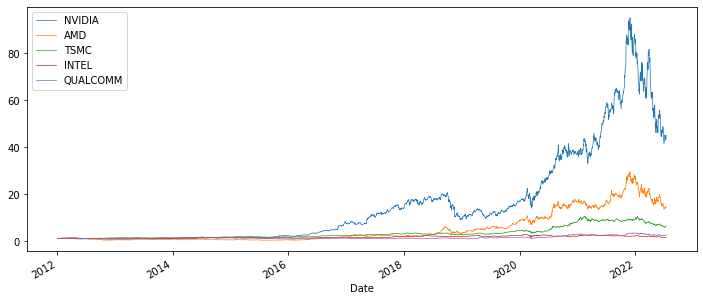

In [5]:
DailyLogReturns=TechCompaniesClosePrice.apply(np.log).diff()
CumulativeReturns=DailyLogReturns.cumsum().apply(np.exp)

ax = CumulativeReturns.plot(linewidth=0.7,figsize=(12,5))

<a id="section3">
<h3 style='color:#5F6A6E' > 3. Creating the correlation matrix of the daily returns</h3>

In [6]:
cov_matrix=DailyLogReturns.corr()
cov_matrix

,NVIDIA,AMD,TSMC,INTEL,QUALCOMM
NVIDIA,1.000000,0.538254,0.533823,0.526478,0.525478
AMD,0.538254,1.000000,0.396969,0.369134,0.388136
TSMC,0.533823,0.396969,1.000000,0.498677,0.523202
INTEL,0.526478,0.369134,0.498677,1.000000,0.503688
QUALCOMM,0.525478,0.388136,0.523202,0.503688,1.000000


<a id="section4">
<h3 style='color:#5F6A6E' > 4. Saving the data (close price and volume) to a CSV file for each ticker</h3>

In [7]:
for key in DataFrameDict:
    DataFrameDict[key].to_csv(key + '.csv', index=True)

In [8]:
import os
import glob
path=os.path.abspath(os.getcwd())
os.chdir(path)
result = glob.glob('*.{}'.format('csv'))
result

['AMD.csv', 'INTEL.csv', 'NVIDIA.csv', 'QUALCOMM.csv', 'TSMC.csv']

<a id="section5">
<h3 style='color:#5F6A6E' > 5. Loading the data from the CSV files into a single DataFrame</h3>

In [9]:
NewDataFrame=pd.DataFrame()
for key in DataFrameDict:
    NewDataFrame=pd.concat([NewDataFrame,pd.read_csv(key + '.csv', index_col='Date',usecols=[0,1], names=['Date',key],header=0)], axis=1)
NewDataFrame.head()

,NVIDIA,AMD,TSMC,INTEL,QUALCOMM
Date,,,,,
2012-01-03,3.5100,5.48,13.26,24.540001,55.270000
2012-01-04,3.5500,5.46,13.14,25.110001,55.830002
2012-01-05,3.6775,5.46,13.26,25.400000,56.060001
2012-01-06,3.6350,5.43,13.15,25.250000,56.160000
2012-01-09,3.6350,5.59,13.38,25.469999,55.910000
